# What are process and threads

1. Process: An independent execution instance of a program. When you run a Python file, you're creating a process with its own memory space and resources.
2. Thread: A lightweight unit of execution within a process. A single process can contain multiple threads that share the same memory space and resources, allowing concurrent execution within that process.

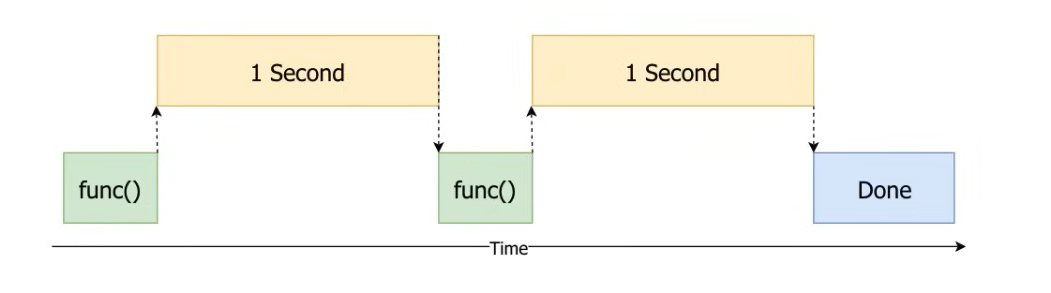

- Synchronously
- CPU is not doing anything during that second.

In [1]:
import time

start = time.time()

def do_something():
    print("Sleeping for a sec")
    time.sleep(1)
    print("Im up")

do_something()
do_something()

finish = time.time()

print(f"Slept for {round(finish-start, 2)} seconds")

Sleeping for a sec
Im up
Sleeping for a sec
Im up
Slept for 2.0 seconds


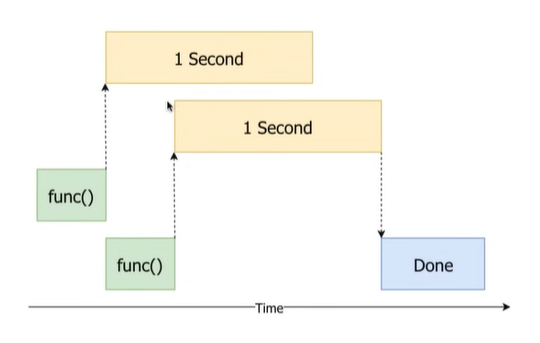
- Multithreading

In [2]:
import time
import threading

start = time.time()

def do_something():
    print("Sleeping for a sec")
    time.sleep(1)
    print("Im up")

t1 = threading.Thread(target=do_something)
t2 = threading.Thread(target=do_something)

# We need to start the threads first - it wont work otherwise
t1.start()
t2.start()

# Withuout below line, the output would just show 0.01 second. Why ?
# Because both the threads ran, and they waited for 1 second each, in the meanwhile the code continued running and printed finish time!
# .join() will join them to main thread, but before that, it doesnt move ahead. It prints 1.01 second which is twice as fast as the first code.
t1.join()
t2.join()

finish = time.time()

print(f"Slept for {round(finish-start, 2)} seconds")

Sleeping for a sec
Sleeping for a sec
Im upIm up

Slept for 1.01 seconds


In [3]:
import time
import threading

start = time.time()

def do_something():
    print("Sleeping for a sec")
    time.sleep(1)
    print("Im up")

threads = []
# What if I want MORE spead up ?
for _ in range(10):
    t = threading.Thread(target=do_something)
    t.start()
    # We cant do .join here since, otherwise the code will create a thread, do_something, join to main, and so on 10 times.
    # which is same as just using main thread
    threads.append(t) # rather we store those threads in a list

# loop over it, and join to the main thread
for t in threads:
    t.join()

finish = time.time()

print(f"Slept for {round(finish-start, 2)} seconds")

Sleeping for a secSleeping for a sec

Sleeping for a sec
Sleeping for a sec
Sleeping for a sec
Sleeping for a sec
Sleeping for a sec
Sleeping for a sec
Sleeping for a sec
Sleeping for a sec
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Slept for 1.01 seconds


In [4]:
# LETS PASS ARGUMENTS
import time
import threading

start = time.time()

def do_something(sec):
    print(f"Sleeping for {sec} second(s)")
    time.sleep(sec)
    print("Im up")

threads = []
for _ in range(10):
    t = threading.Thread(target=do_something, args=[1.5]) # We use args to add arguments in a form of list.
    t.start()
    threads.append(t)

for t in threads:
    t.join()

finish = time.time()

print(f"Slept for {round(finish-start, 2)} seconds")
# Instead of 15 seconds, it is running in 1.5 seconds

Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Sleeping for 1.5 second(s)
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Im up
Slept for 1.52 seconds


In [5]:
import time
import concurrent.futures # Easier faster way of multithreading AND MULTIPROCESSING, and less code.

start = time.time()

def do_something(sec):
    print(f"Sleeping for {sec} second(s)")
    time.sleep(sec)
    return "Im up"

# This is a ThreadPoolExecutor used using a context manager. This executor can ccreate threads and join them and do a lot.
# This is newer and faster way to work with threads.
with concurrent.futures.ThreadPoolExecutor() as exec: # Now that is something new
    # Submit executes the function inside it with the argument being passed with it. Returns whatever the function returns
    f1 = exec.submit(do_something, 1) 
    f2 = exec.submit(do_something, 1)

    # This prints whatever the function returned.
    print(f1.result())
    print(f2.result())

finish = time.time()

print(f"Slept for {round(finish-start, 2)} seconds")

Sleeping for 1 second(s)
Sleeping for 1 second(s)
Im up
Im up
Slept for 1.01 seconds


In [6]:
import time
import concurrent.futures # Easier faster way of multithreading AND MULTIPROCESSING, and less code.

start = time.time()

def do_something(sec):
    print(f"Sleeping for {sec} second(s)")
    time.sleep(sec)
    return f"Im up after {sec} second(s)"

with concurrent.futures.ThreadPoolExecutor() as exec: # Now that is something new
    
    secs = [5, 4, 3, 2, 1]

    # HERE, we print in the manner, the threads are finished.
    # res = [exec.submit(do_something, sec) for sec in secs]
    # for f in concurrent.futures.as_completed(res): # nothign but gets the output in format AFTER completion
    #     print(f.result())

    # But here, we map the function with secs arguments and run it, leading to finish threading, in order they were passed in
    # This still is equally fast.
    # res = exec.map(do_something, secs)
    # for r in res:
    #     print(r)

finish = time.time()

print(f"Slept for {round(finish-start, 2)} seconds")

Slept for 0.0 seconds


In [2]:
# NORMALLY
import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()

# Takes 38 seconds on average !!!!
# for img_url in img_urls:
#     img_bytes = requests.get(img_url).content
#     img_name = img_url.split('/')[3]
#     img_name = f'./demo/{img_name}.jpg'
#     with open(img_name, 'wb') as img_file:
#         img_file.write(img_bytes)
#         print(f'{img_name} was downloaded...')

def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'./demo/{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

# ThreadPoolExtractor ! - Takes about 17-18 seconds
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_image, img_urls)

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

./demo/photo-1507143550189-fed454f93097.jpg was downloaded...
./demo/photo-1513938709626-033611b8cc03.jpg was downloaded...
./demo/photo-1504198453319-5ce911bafcde.jpg was downloaded...
./demo/photo-1516117172878-fd2c41f4a759.jpg was downloaded...
./demo/photo-1541698444083-023c97d3f4b6.jpg was downloaded...
./demo/photo-1524429656589-6633a470097c.jpg was downloaded...
./demo/photo-1516972810927-80185027ca84.jpg was downloaded...
./demo/photo-1532009324734-20a7a5813719.jpg was downloaded...
./demo/photo-1522364723953-452d3431c267.jpg was downloaded...
./demo/photo-1549692520-acc6669e2f0c.jpg was downloaded...
./demo/photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
./demo/photo-1550439062-609e1531270e.jpg was downloaded...
./demo/photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
./demo/photo-1530224264768-7ff8c1789d79.jpg was downloaded...
./demo/photo-1564135624576-c5c88640f235.jpg was downloaded...
Finished in 19.388794500002405 seconds
